In [94]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [29]:
# # Importing with reset index

products = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='products', header=0)
products.reset_index(inplace=True) # we are creating an index column because, in this particular sales dataset, no value is necessarily unique, except for the index
products=products.rename(columns={"index": "index_col"}) # we need to change the name of the column to something else

stock = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='stock', header=0)
stock.reset_index(inplace=True) 
stock=stock.rename(columns={"index": "index_col"}) 

assessment = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='assessment', header=0)
assessment.reset_index(inplace=True) 
assessment=assessment.rename(columns={"index": "index_col"}) 

invoices = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='invoices', header=0)
invoices.reset_index(inplace=True) 
invoices=invoices.rename(columns={"index": "index_col"}) 

customers = pd.read_excel(r'C:\Users\jspad\Documents\Code Academy\Sqlite Projects\sales original.xlsx', 
    sheet_name='customers', header=0)
customers.reset_index(inplace=True) 
customers=customers.rename(columns={"index": "index_col"}) 



In [30]:
# Checking import dataset by sheets
products.head(20)
stock.head(10)
assessment.head(10)
invoices.head(10)
customers.head(10)


,index_col,CustomerID,Country
0,0,18011,Germany
1,1,18011,Germany
2,2,18011,Germany
3,3,18011,Germany
4,4,18011,Germany
5,5,18011,Germany
6,6,18011,Germany
7,7,13576,Germany
8,8,15235,Germany
9,9,16835,Germany


In [31]:
#Merging datasets

part_df=pd.merge(products, stock, on="index_col")
part_df=part_df.drop(['ASIN_y'], axis=1)

part2_df=pd.merge(part_df, assessment, on="index_col")
part2_df=part2_df.drop(['ASIN_x'], axis=1)

part3_df=pd.merge(part2_df, invoices, on="index_col")
part3_df=part3_df.drop(['ASIN_y'], axis=1)

full_df=pd.merge(part3_df, customers, on="index_col")
full_df=full_df.drop(['CustomerID_y', 'index_col'], axis=1)


In [32]:
# Database Info and shape

full_df.info()

full_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 554417 entries, 0 to 554416
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         554417 non-null  object        
 1   product_type  554417 non-null  object        
 2   StockCode     554417 non-null  object        
 3   rating        554417 non-null  float64       
 4   review_count  554417 non-null  int64         
 5   ASIN_x        554417 non-null  object        
 6   InvoiceNo     554417 non-null  object        
 7   Quantity      554417 non-null  int64         
 8   price         554417 non-null  float64       
 9   total_sale    554417 non-null  float64       
 10  invoice_date  554417 non-null  datetime64[ns]
 11  invoice_time  554417 non-null  int64         
 12  CustomerID_x  554417 non-null  object        
 13  Country       554417 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 

,title,product_type,StockCode,rating,review_count,ASIN_x,InvoiceNo,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID_x,Country
0,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,4.6,1399,B07GWKDLGT,78536597,4,496.95,1987.80,2018-12-01,17,18011,Germany
1,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,4.6,289,B01MTLH408,78536597,4,39.99,159.96,2018-12-01,17,18011,Germany
2,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,85034A,4.4,333,B0064FS7HI,78536597,1,12.99,12.99,2018-12-01,17,18011,Germany
3,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,72798C,4.3,86,B013JHU5YG,78536597,1,199.99,199.99,2018-12-01,17,18011,Germany
4,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,20726,4.7,15717,B06XWN9Q99,78536597,1,7.49,7.49,2018-12-01,17,18011,Germany


In [33]:
#Making a copy  of dataset
df_de=full_df.copy()

In [34]:
#Convert time and date into timestamp objects 
t= df_de['invoice_time']
df_de['invoice_time'] = pd.to_datetime(t, format='%H').dt.time

d = df_de['invoice_date']
df_de['invoice_date'] = pd.to_datetime(d).dt.date


#Combine time and date into one column
df_de['invoice_date'] = df_de.apply(lambda r : pd.datetime.combine(r['invoice_date'],r['invoice_time']),1)


<ipython-input-34-ccfb521a2b22>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_de['invoice_date'] = df_de.apply(lambda r : pd.datetime.combine(r['invoice_date'],r['invoice_time']),1)


In [35]:
# Dropping columns

df_de=df_de.drop(['invoice_time', 'StockCode', 'title', 'rating', 'review_count', 'ASIN_x', 'Quantity'], axis=1)

In [36]:
# Data cleaning - checking missing values (Customerid missing) 
#np.issubdtype(df['CustomerID_x'].dtype, np.number)

df_de=df_de[pd.to_numeric(df_de['CustomerID_x'], errors='coerce').notnull()]


In [37]:
# Rename
df_de=df_de.rename(columns={"CustomerID_x": "CustomerID"})

In [38]:
# Transforming these labels into categrical data type

df_de['product_type'] = pd.Categorical(df_de['product_type'],
categories=['dslr camera', 'keyboard', 'monitor', 'mouse', 'processor', 'smartphone',])


df_de['Country'] = pd.Categorical(df_de['Country'],
categories=['Australia','Austria','Bahrain','Belgium','Brazil','Canada','Cyprus','Czech Republic','Denmark','European Community','Finland','France','Germany','Greece',
            'Iceland','Ireland','Israel','Italy','Japan','Lebanon','Lithuania','Malta','Netherlands','Norway','Poland','Portugal','Saudi Arabia','Singapore',
            'South Africa','Spain','Sweden','Switzerland','United Arab Emirates','United Kingdom','United States','Unknown'])


In [39]:
df_de.info()

df_de


<class 'pandas.core.frame.DataFrame'>
Int64Index: 415102 entries, 0 to 554416
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   product_type  415102 non-null  category      
 1   InvoiceNo     415102 non-null  object        
 2   price         415102 non-null  float64       
 3   total_sale    415102 non-null  float64       
 4   invoice_date  415102 non-null  datetime64[ns]
 5   CustomerID    415102 non-null  object        
 6   Country       415102 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), object(2)
memory usage: 19.8+ MB


,product_type,InvoiceNo,price,total_sale,invoice_date,CustomerID,Country
0,dslr camera,78536597,496.95,1987.80,2018-12-01 17:00:00,18011,Germany
1,dslr camera,78536597,39.99,159.96,2018-12-01 17:00:00,18011,Germany
2,dslr camera,78536597,12.99,12.99,2018-12-01 17:00:00,18011,Germany
3,dslr camera,78536597,199.99,199.99,2018-12-01 17:00:00,18011,Germany
4,dslr camera,78536597,7.49,7.49,2018-12-01 17:00:00,18011,Germany
...,...,...,...,...,...,...,...
554412,smartphone,78581476,14.99,179.88,2019-12-09 08:00:00,12433,Norway
554413,smartphone,78581476,29.99,179.94,2019-12-09 08:00:00,12433,Norway
554414,smartphone,78581475,6.97,83.64,2019-12-09 08:00:00,13069,Germany
554415,smartphone,78581475,13.99,279.80,2019-12-09 08:00:00,13069,Germany


In [176]:
# Data Selection: Germany

df_domestic=df_de.drop(df_de.loc[df_de['Country'] != 'Germany'].index, inplace=True)

df_domestic=pd.DataFrame(data=(df_de))

df_domestic


,product_type,InvoiceNo,price,total_sale,invoice_date,CustomerID,Country
0,dslr camera,78536597,496.95,1987.80,2018-12-01 17:00:00,18011,Germany
1,dslr camera,78536597,39.99,159.96,2018-12-01 17:00:00,18011,Germany
2,dslr camera,78536597,12.99,12.99,2018-12-01 17:00:00,18011,Germany
3,dslr camera,78536597,199.99,199.99,2018-12-01 17:00:00,18011,Germany
4,dslr camera,78536597,7.49,7.49,2018-12-01 17:00:00,18011,Germany
...,...,...,...,...,...,...,...
554396,smartphone,78581478,11.04,529.92,2019-12-09 08:00:00,17364,Germany
554397,smartphone,78581477,17.88,214.56,2019-12-09 08:00:00,13426,Germany
554414,smartphone,78581475,6.97,83.64,2019-12-09 08:00:00,13069,Germany
554415,smartphone,78581475,13.99,279.80,2019-12-09 08:00:00,13069,Germany


In [177]:
df_domestic2=df_domestic.drop(['product_type', 'InvoiceNo', 'price', 'CustomerID', 'Country'], axis=1)

df_domestic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370563 entries, 0 to 554416
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   total_sale    370563 non-null  float64       
 1   invoice_date  370563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.5 MB


In [179]:
# Select the first quantile
q1 =df_domestic2['total_sale'].quantile(.25)

# Select the third quantile
q3 = df_domestic2['total_sale'].quantile(.75)

# Create a mask inbeetween q1 & q3
mask = df_domestic2['total_sale'].between(q1, q3, inclusive=True)

# Filtering the initial dataframe with a mask
iqr = df_domestic2.loc[mask, 'total_sale']

iqr

1         159.96
3         199.99
5         335.86
6          71.70
7         395.00
           ...  
554395     79.96
554396    529.92
554397    214.56
554414     83.64
554415    279.80
Name: total_sale, Length: 185612, dtype: float64

In [ ]:
def iqr(df, colname, bounds = [.25, .75]):
    s = df_domestic2[colname]
    q = s.quantile(bounds)
    return df[~s.clip(*q).isin(q)]

In [183]:

def subset_by_iqr(df, column, whisker_width=1.5):
    filter = (df_domestic2['total_sale'] >= q1 - whisker_width*iqr) & (df_domestic2['total_sale'] <= q3 + whisker_width*iqr)
    return df_domestic2.loc[filter]                                                      

# Example for whiskers = 1.5, as requested by the OP
df_filtered = subset_by_iqr(df_domestic2, 'total_sale', whisker_width=1.5)

ValueError: Can only compare identically-labeled Series objects

In [ ]:
# First atempt Bigshotstyle

# def convert_dates(df, date_column, replace_index, time_zone='CET'):
#     df[date_column] = pd.to_datetime(df[date_column], utc=True).dt.tz_convert(time_zone)
#     if replace_index == False:
#         return df
#     else:
#         df.index = df[date_column]
#         return df

# df_domestic2 = convert_dates(df_domestic2, 'invoice_date', replace_index=True)

# df_domestic2 = df_domestic2.resample('d').sum()
# df_domestic2['ds'] = df_domestic2.index.values
# df_domestic2.index = range(0, len(df_domestic2))
# df_domestic2['ds'] = df_domestic2.ds.dt.date

# df_domestic2 = df_domestic2.rename(columns={'total_sale':'y'})

# df_domestic2 = df_domestic2[['ds', 'y']]

In [ ]:
Q1 = df_domestic2.quantile(0.25)
Q3 = df_domestic2.quantile(0.75)
IQR = Q3 - Q1

df_quantile = df_domestic2[~((df_domestic2 < (Q1 - 1.5 * IQR)) | (df_domestic2 > (Q3 + 1.5 * IQR))).any(axis=1)]

df_quantile

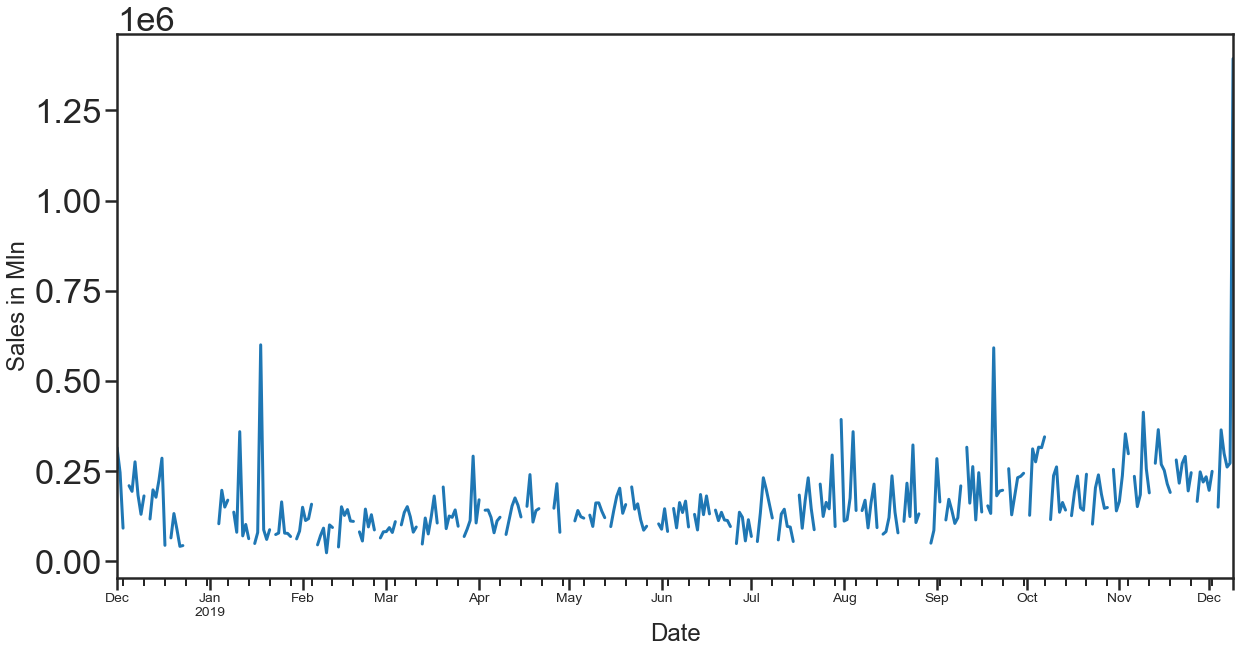

In [153]:
df_domestic = df_domestic.groupby(df_domestic['invoice_date'])['total_sale'].sum().reset_index()
df_domestic = df_domestic.set_index('invoice_date')
df_domestic.index = pd.to_datetime(df_domestic.index)

y = df_domestic['total_sale']#.resample('d').mean()


y.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Sales in Mln');

In [168]:
# Top 10 Spender DF

df_de10=df_domestic.drop(df_domestic.loc[
    (df_domestic.CustomerID != 17450) & 
    (df_domestic.CustomerID != 18102) & 
    (df_domestic.CustomerID != 13694) & 
    (df_domestic.CustomerID != 17511) &
    (df_domestic.CustomerID != 14298) &
    (df_domestic.CustomerID != 16446) &
    (df_domestic.CustomerID != 15769) &
    (df_domestic.CustomerID != 16029) &
    (df_domestic.CustomerID != 12346) &
    (df_domestic.CustomerID != 16684)].index, inplace=True)

df_de10=pd.DataFrame(data=(df_domestic))

df_de10

,product_type,InvoiceNo,price,total_sale,invoice_date,CustomerID,Country
407,dslr camera,78536437,79.99,3839.52,2018-12-01 12:00:00,13694,Germany
492,dslr camera,78536390,348.00,100224.00,2018-12-01 10:00:00,17511,Germany
493,dslr camera,78536390,59.95,2877.60,2018-12-01 10:00:00,17511,Germany
498,dslr camera,78536387,31.99,6142.08,2018-12-01 09:00:00,16029,Germany
499,dslr camera,78536386,95.99,3455.64,2018-12-01 09:00:00,16029,Germany
...,...,...,...,...,...,...,...
551612,smartphone,78581457,22.99,2896.74,2019-12-08 18:00:00,18102,Germany
551621,smartphone,78581455,22.99,413.82,2019-12-08 18:00:00,18102,Germany
551622,smartphone,78581455,16.99,169.90,2019-12-08 18:00:00,18102,Germany
554073,smartphone,78581566,16.99,2446.56,2019-12-09 11:00:00,18102,Germany


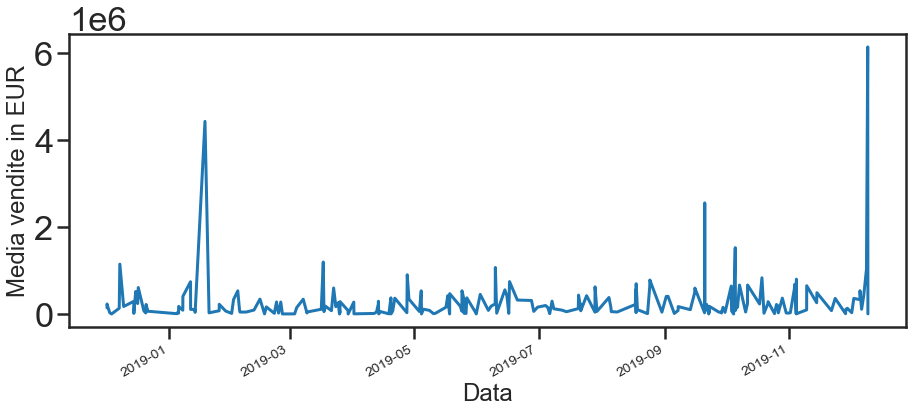

In [169]:

#Top 10 sales

df_de10 = df_de10.groupby(df_de10['invoice_date'])['total_sale'].sum().reset_index()
df_de10 = df_de10.set_index('invoice_date')
df_de10.index = pd.to_datetime(df_de10.index)

y = df_de10['total_sale']#.resample('d').mean()


y.plot(figsize=(15, 6))
plt.xlabel('Data')
plt.ylabel('Media vendite in EUR');

In [ ]:
#Novo progetto

f_clean = convert_dates(df_clean, 'Created at', replace_index=True)

df_clean = df_clean.resample('d').sum()
df_clean['ds'] = df_clean.index.values
df_clean.index = range(0, len(df_clean))
df_clean['ds'] = df_clean.ds.dt.date

df_clean = df_clean.rename(columns={'Total':'y'})

df_clean = df_clean[['ds', 'y']]

from fbprophet import Prophet

baseline = Prophet(yearly_seasonality=True, weekly_seasonality=False)
baseline.fit(df_quantile)


summer_sales = pd.DataFrame({
  'holiday': 'summer_sales',
  'ds': pd.date_range(start='1/07/2018', end='15/08/2018'),
  'lower_window': -5,
  'upper_window': 0,
})

black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.date_range(start='23/11/2018', end='23/11/2018'),
  'lower_window': 0,
  'upper_window': 0,
})

christmas = pd.DataFrame({
  'holiday': 'christmas',
  'ds': pd.date_range(start='15/12/2018', end='24/12/2018'),
  'lower_window': 0,
  'upper_window': 0,
})
holidays = pd.concat((summer_sales, black_friday, christmas))

m_holidays = Prophet(yearly_seasonality=True, weekly_seasonality=False, holidays=holidays)
m_holidays.add_country_holidays(country_name='IT')

m_holidays.fit(df_quantile)

In [170]:
# Pivot Table per Invoice

table_invoice = pd.pivot_table(df_domestic, values='total_sale', index=['InvoiceNo'],
                    aggfunc=np.sum,
                    observed=True)

table_invoice=table_invoice.sort_values(by=['total_sale'], ascending=False)


table_invoice.head(50)

,total_sale
InvoiceNo,
78581483,6146710.55
78541431,4433604.10
78567423,2557541.80
78546789,1196476.00
78556267,1070572.85
78581457,1007017.28
78571653,833452.84
78569570,766468.80
78557125,745663.84


In [79]:
# Pivot tabel per Customer - Top 10 Spender

table_customer = pd.pivot_table(df_domestic, values='total_sale', index=['CustomerID'],
                    aggfunc=np.sum,
                    observed=True)

table_customer=table_customer.sort_values(by=['total_sale'], ascending=False)

table_customer.head(10)

,total_sale
CustomerID,
17450,9061246.11
18102,8114485.22
13694,7790444.65
17511,6785995.96
14298,6644346.58
16446,6147232.32
15769,5065042.84
16029,5036025.15
12346,4433604.10


In [57]:
# Pivot tabel per Category of Product

table_product = pd.pivot_table(df_domestic, values='total_sale', index=[ 'product_type'],
                    aggfunc=np.sum,
                    observed=True)

table_product=table_product.sort_values(by=['total_sale'], ascending=False)

table_product

,total_sale
product_type,
smartphone,1.236111e+08
processor,1.224071e+08
dslr camera,9.344116e+07
keyboard,5.019172e+07
monitor,4.150064e+07
mouse,2.560882e+07


In [23]:
# Which countries and which customers made the highest number of orders? Are they the same with the highest spending?


country_sales=df_country.groupby('Country')['total_sale'].agg(['sum','count','mean']).sort_values(by=['count'], ascending=False)

country_sales


,sum,count,mean
Country,,,
Germany,4.567605e+08,370563,1232.612216
United Kingdom,1.238764e+07,9827,1260.571785
France,1.149104e+07,8434,1362.466175
Ireland,1.530354e+07,7603,2012.829133
Spain,2.754244e+06,2551,1079.672407
Netherlands,2.200264e+07,2448,8988.007185
Belgium,2.474314e+06,2004,1234.687570
Switzerland,2.730491e+06,1889,1445.468894
Portugal,1.707936e+06,1527,1118.490956


In [26]:
#%reset